In [1]:
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
import time

from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier

plt.style.use("ggplot")

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Functions for printing, splitting, ml defining and generating polynomials

In [28]:
# Baseline cascade for classification

In [27]:
# Modification 1

In [38]:
# Modification 2

In [8]:
# Modification 3

In [65]:
data = pd.read_csv("./CVD_cleaned.csv")

In [66]:
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [67]:
data.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [70]:
data.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [72]:
for i in list(data.columns):
    print(i,data[i].value_counts().shape[0])

General_Health 5
Checkup 5
Exercise 2
Heart_Disease 2
Skin_Cancer 2
Other_Cancer 2
Depression 2
Diabetes 4
Arthritis 2
Sex 2
Age_Category 13
Height_(cm) 99
Weight_(kg) 525
BMI 3654
Smoking_History 2
Alcohol_Consumption 31
Fruit_Consumption 77
Green_Vegetables_Consumption 75
FriedPotato_Consumption 69


In [73]:
# Count duplicates
duplicate_count = data.duplicated().sum()

# Print the count
print("Number of duplicates:", duplicate_count)

Number of duplicates: 80


In [74]:
# Remove duplicate rows
data = data.drop_duplicates()

In [75]:
# Count duplicates
duplicate_count = data.duplicated().sum()

# Print the count
print("Number of duplicates:", duplicate_count)

Number of duplicates: 0


In [77]:
# BMI Category
data['BMI_Category'] = pd.cut(data['BMI'], bins=[0, 18.5, 24.9, 29.9, np.inf], labels=['Underweight', 'Normal weight', 'Overweight', 'Obesity'])

# Health Checkup Frequency
checkup_mapping = {'Within the past year': 4, 'Within the past 2 years': 2, 'Within the past 5 years': 1, '5 or more years ago': 0.2, 'Never': 0}
data['Checkup_Frequency'] = data['Checkup'].replace(checkup_mapping)

# Lifestyle Score
exercise_mapping = {'Yes': 1, 'No': 0}
smoking_mapping = {'Yes': -1, 'No': 0}
data['Lifestyle_Score'] = data['Exercise'].replace(exercise_mapping) - data['Smoking_History'].replace(smoking_mapping) + data['Fruit_Consumption']/10 + data['Green_Vegetables_Consumption']/10 - data['Alcohol_Consumption']/10

# Healthy Diet Score
data['Healthy_Diet_Score'] = data['Fruit_Consumption']/10 + data['Green_Vegetables_Consumption']/10 - data['FriedPotato_Consumption']/10

# Interaction Terms
data['Smoking_Alcohol'] = data['Smoking_History'].replace(smoking_mapping) * data['Alcohol_Consumption']
data['Checkup_Exercise'] = data['Checkup_Frequency'] * data['Exercise'].replace(exercise_mapping)

# Ratio of Height to Weight
data['Height_to_Weight'] = data['Height_(cm)'] / data['Weight_(kg)']

# Fruit and Vegetables Consumption Interaction
data['Fruit_Vegetables'] = data['Fruit_Consumption'] * data['Green_Vegetables_Consumption']

# Healthy_Diet_Lifestyle Interaction
data['HealthyDiet_Lifestyle'] = data['Healthy_Diet_Score'] * data['Lifestyle_Score']

# Alcohol_FriedPotato Interaction
data['Alcohol_FriedPotato'] = data['Alcohol_Consumption'] * data['FriedPotato_Consumption']

In [78]:
# Mapping for Diabetes
diabetes_mapping = {
    'No': 0, 
    'No, pre-diabetes or borderline diabetes': 0, 
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
data['Diabetes'] = data['Diabetes'].map(diabetes_mapping)

# One-hot encoding for Sex
data = pd.get_dummies(data, columns=['Sex'])

# Convert remaining categorical variables with "Yes" and "No" values to binary format for correlation computation
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History','Exercise']

for column in binary_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})
    
# Ordinal encoding for General_Health, Age_Category,BMI_Category
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}
data['General_Health'] = data['General_Health'].map(general_health_mapping)

bmi_mapping = {
    'Underweight': 0,
    'Normal weight': 1,
    'Overweight': 2,
    'Obesity': 3
}

data['BMI_Category'] = data['BMI_Category'].map(bmi_mapping).astype(int)

age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
data['Age_Category'] = data['Age_Category'].map(age_category_mapping)    

data = data.drop(["Checkup"],axis=1)

In [24]:
# Remove duplicate rows
data = data.drop_duplicates()

In [79]:
data_heart_disease = data.Heart_Disease 
del data['Heart_Disease']
data['Heart_Disease'] = data_heart_disease

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308774 entries, 0 to 308853
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308774 non-null  int64  
 1   Exercise                      308774 non-null  int64  
 2   Skin_Cancer                   308774 non-null  int64  
 3   Other_Cancer                  308774 non-null  int64  
 4   Depression                    308774 non-null  int64  
 5   Diabetes                      308774 non-null  int64  
 6   Arthritis                     308774 non-null  int64  
 7   Age_Category                  308774 non-null  int64  
 8   Height_(cm)                   308774 non-null  float64
 9   Weight_(kg)                   308774 non-null  float64
 10  BMI                           308774 non-null  float64
 11  Smoking_History               308774 non-null  int64  
 12  Alcohol_Consumption           308774 non-nul

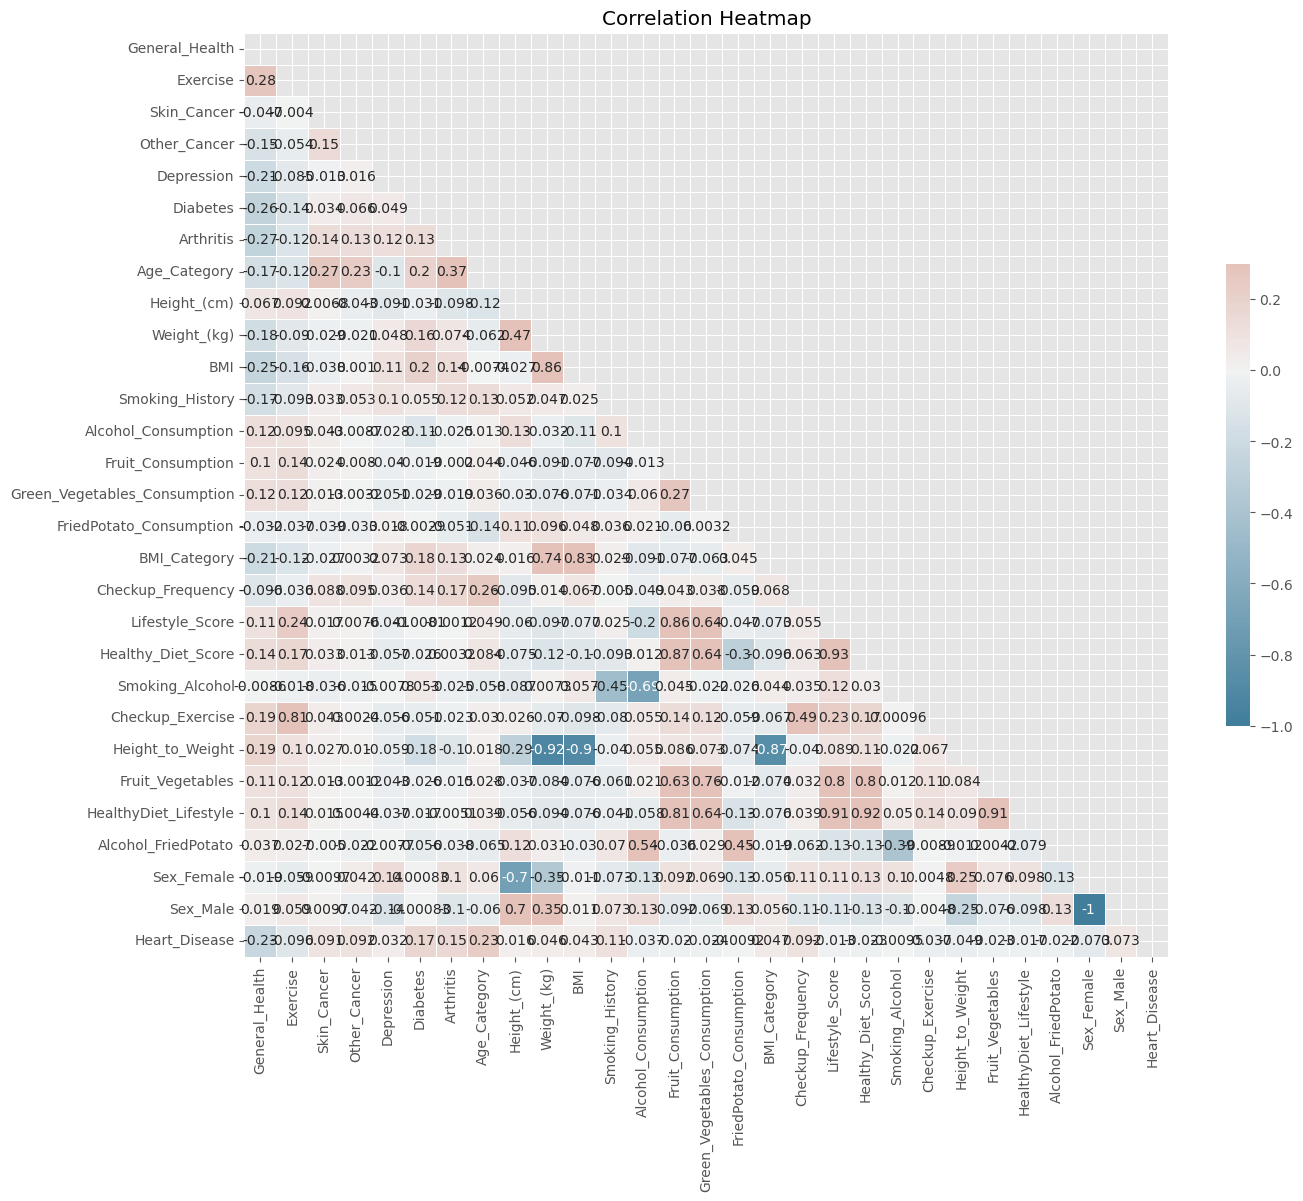

In [81]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Heatmap')
plt.show()

Exception ignored in: <function ZipFile.__del__ at 0x000001F331FBCEE0>
Traceback (most recent call last):
  File "c:\Users\Admin\anaconda3\lib\zipfile.py", line 1819, in __del__
    self.close()
  File "c:\Users\Admin\anaconda3\lib\zipfile.py", line 1836, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file


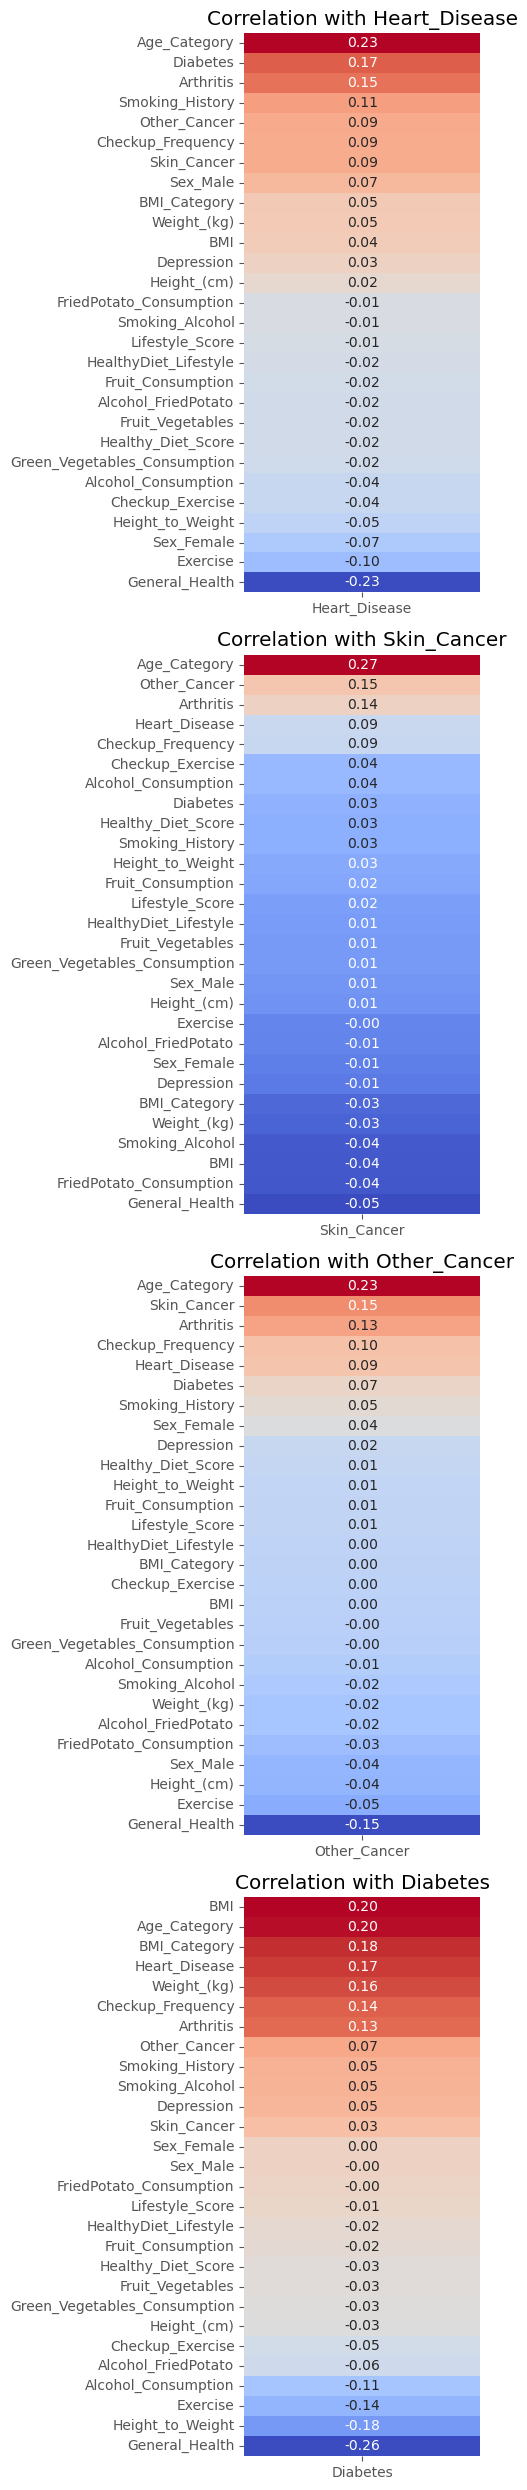

In [82]:
# Compute the correlation of each feature with the disease variables
disease_variables = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Diabetes']

# Compute the correlation matrix
corr = data.corr()

# Create a subplot for each disease
fig, axs = plt.subplots(len(disease_variables), 1, figsize=(5, 25))

for ax, disease in zip(axs, disease_variables):
    # Compute the correlation with the disease
    target_corr = corr[disease].drop(disease)

    # Sort correlation values in descending order
    target_corr_sorted = target_corr.sort_values(ascending=False)

    # Plot a heatmap of the correlations with the disease
    sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f', cbar=False, ax=ax)
    ax.set_title('Correlation with ' + disease)

plt.tight_layout()
plt.show()

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308774 entries, 0 to 308853
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308774 non-null  int64  
 1   Exercise                      308774 non-null  int64  
 2   Skin_Cancer                   308774 non-null  int64  
 3   Other_Cancer                  308774 non-null  int64  
 4   Depression                    308774 non-null  int64  
 5   Diabetes                      308774 non-null  int64  
 6   Arthritis                     308774 non-null  int64  
 7   Age_Category                  308774 non-null  int64  
 8   Height_(cm)                   308774 non-null  float64
 9   Weight_(kg)                   308774 non-null  float64
 10  BMI                           308774 non-null  float64
 11  Smoking_History               308774 non-null  int64  
 12  Alcohol_Consumption           308774 non-nul

In [85]:
import pandas as pd

def split_dataframe_to_csv(df, output_file_80, output_file_20, split_ratio=0.8, target_column='target', class_column='class'):
    # Split the DataFrame into two DataFrames based on the target class
    df_0 = df[df['Heart_Disease'] == 0]
    df_1 = df[df['Heart_Disease'] == 1]

    # Shuffle both DataFrames to make the split random
    df_0 = df_0.sample(frac=1).reset_index(drop=True)
    df_1 = df_1.sample(frac=1).reset_index(drop=True)

    # Calculate the number of samples for each class in the test set
    test_samples_per_class = int(len(df) * (1 - split_ratio) / 2)

    # Take the required number of samples from each class for the test set
    df_0_test = df_0.iloc[:test_samples_per_class]
    df_1_test = df_1.iloc[:test_samples_per_class]

    # Combine the test sets of both classes
    df_test = pd.concat([df_0_test, df_1_test])

    # Create the training sets for both classes
    df_0_train = df_0.iloc[test_samples_per_class:]
    df_1_train = df_1.iloc[test_samples_per_class:]

    # Combine the training sets of both classes
    df_train = pd.concat([df_0_train, df_1_train])

    # Shuffle the training and test sets again
    df_train = df_train.sample(frac=1).reset_index(drop=True)
    df_test = df_test.sample(frac=1).reset_index(drop=True)

    # Save the training and test sets to CSV files
    df_train.to_csv(output_file_80, index=False)
    df_test.to_csv(output_file_20, index=False)

# Usage example
# Assuming you have one pandas DataFrame df with 'target' and 'class' columns
output_file_80 = 'CVD_train_b.csv'
output_file_20 = 'CVD_test_b.csv'
split_ratio = 0.8

split_dataframe_to_csv(data, output_file_80, output_file_20, split_ratio)


## Test of SGDClassifier

In [20]:
data_train = pd.read_csv("./CVD_train.csv")
data_test = pd.read_csv("./CVD_test.csv")

In [4]:
# data_heart_disease = data_test.Heart_Disease 
# del data_test['Heart_Disease']
# data_test['Heart_Disease'] = data_heart_disease
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61755 entries, 0 to 61754
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   General_Health                61755 non-null  int64  
 1   Exercise                      61755 non-null  int64  
 2   Skin_Cancer                   61755 non-null  int64  
 3   Other_Cancer                  61755 non-null  int64  
 4   Depression                    61755 non-null  int64  
 5   Diabetes                      61755 non-null  int64  
 6   Arthritis                     61755 non-null  int64  
 7   Age_Category                  61755 non-null  int64  
 8   Height_(cm)                   61755 non-null  float64
 9   Weight_(kg)                   61755 non-null  float64
 10  BMI                           61755 non-null  float64
 11  Smoking_History               61755 non-null  int64  
 12  Alcohol_Consumption           61755 non-null  float64
 13  F

In [5]:
# data_heart_disease = data_train.Heart_Disease 
# del data_train['Heart_Disease']
# data_train['Heart_Disease'] = data_heart_disease
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247016 entries, 0 to 247015
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                247016 non-null  int64  
 1   Exercise                      247016 non-null  int64  
 2   Skin_Cancer                   247016 non-null  int64  
 3   Other_Cancer                  247016 non-null  int64  
 4   Depression                    247016 non-null  int64  
 5   Diabetes                      247016 non-null  int64  
 6   Arthritis                     247016 non-null  int64  
 7   Age_Category                  247016 non-null  int64  
 8   Height_(cm)                   247016 non-null  float64
 9   Weight_(kg)                   247016 non-null  float64
 10  BMI                           247016 non-null  float64
 11  Smoking_History               247016 non-null  int64  
 12  Alcohol_Consumption           247016 non-nul

## Balancing

In [8]:
data_train.iloc[:,-1]=data_train.iloc[:,-1].astype(int)
equilibre=data_train.iloc[:,-1].value_counts()
print(equilibre)

0    227005
1     20011
Name: Heart_Disease, dtype: int64


In [63]:
data_test.iloc[:,-1]=data_test.iloc[:,-1].astype(int)
equilibre=data_test.iloc[:,-1].value_counts()
print(equilibre)

0    56795
1     4960
Name: Heart_Disease, dtype: int64


In [9]:
train_X = data_train.iloc[:, :-1]
train_y = data_train.iloc[:,-1]
test_X = data_test.iloc[:, :-1]
test_y = data_test.iloc[:,-1]

train_X, test_X = scale('max_abs_scaler', train_X, test_X)

print("Pre-balanced: ")
print("train_X: ",train_X.shape)
print("test_X: ",test_X.shape)
print("train_y: ",train_y.shape)
print("test_y: ",test_y.shape)


Pre-balanced: 
train_X:  (247016, 28)
test_X:  (61755, 28)
train_y:  (247016,)
test_y:  (61755,)


In [41]:
# Data balancing experiment

import time
excel_writer = pd.ExcelWriter('experiment-optimal-balancing-SGDC2.xlsx')
row_offset = 0

count_class_values = range(50000, 150001, 25000)

results = []

model_original = init_model('sgdc')

sta_time = time.time()
model_original.fit(train_X, train_y)
edn_time = time.time()

time0 = edn_time - sta_time

# Calculate metrics for SMOTE+NearMiss
train_pred_original = model_original.predict(train_X)
test_pred_original = model_original.predict(test_X)

metrics_train_original = {
    'accuracy': accuracy_score(train_y, train_pred_original),
    'precision': precision_score(train_y, train_pred_original, average='weighted'),
    'recall': recall_score(train_y, train_pred_original, average='weighted'),
    'f1_score': f1_score(train_y, train_pred_original, average='weighted'),
    'kappa': cohen_kappa_score(train_y, train_pred_original),
    'mcc': matthews_corrcoef(train_y, train_pred_original)
}

metrics_test_original = {
    'accuracy': accuracy_score(test_y, test_pred_original),
    'precision': precision_score(test_y, test_pred_original, average='weighted'),
    'recall': recall_score(test_y, test_pred_original, average='weighted'),
    'f1_score': f1_score(test_y, test_pred_original, average='weighted'),
    'kappa': cohen_kappa_score(test_y, test_pred_original),
    'mcc': matthews_corrcoef(test_y, test_pred_original)
}

results.append(
    {'Sampler': 'Original', 'Training Time': time0, 'Class Count': '227005/20011',
    'Train Accuracy': metrics_train_original['accuracy'], 'Test Accuracy': metrics_test_original['accuracy'],
    'Train Precision': metrics_train_original['precision'], 'Test Precision': metrics_test_original['precision'],
    'Train Recall': metrics_train_original['recall'], 'Test Recall': metrics_test_original['recall'],
    'Train F1 Score': metrics_train_original['f1_score'], 'Test F1 Score': metrics_test_original['f1_score'],
    'Train Kappa': metrics_train_original['kappa'], 'Test Kappa': metrics_test_original['kappa'],
    'Train MCC': metrics_train_original['mcc'], 'Test MCC': metrics_test_original['mcc']}
)

# First pipeline with SMOTE
smote_pipe = make_pipeline(SMOTE())

train_X_smote, train_y_smote = smote_pipe.fit_resample(train_X, train_y)

model_smote = init_model('sgdc')

st1 = time.time()
model_smote.fit(train_X_smote, train_y_smote)
ed1 = time.time()

t1 = ed1 - st1

# Calculate metrics for SMOTE
train_pred_smote = model_smote.predict(train_X_smote)
test_pred_smote = model_smote.predict(test_X)

metrics_train_smote = {
    'accuracy': accuracy_score(train_y_smote, train_pred_smote),
    'precision': precision_score(train_y_smote, train_pred_smote, average='weighted'),
    'recall': recall_score(train_y_smote, train_pred_smote, average='weighted'),
    'f1_score': f1_score(train_y_smote, train_pred_smote, average='weighted'),
    'kappa': cohen_kappa_score(train_y_smote, train_pred_smote),
    'mcc': matthews_corrcoef(train_y_smote, train_pred_smote)
}

metrics_test_smote = {
    'accuracy': accuracy_score(test_y, test_pred_smote),
    'precision': precision_score(test_y, test_pred_smote, average='weighted'),
    'recall': recall_score(test_y, test_pred_smote, average='weighted'),
    'f1_score': f1_score(test_y, test_pred_smote, average='weighted'),
    'kappa': cohen_kappa_score(test_y, test_pred_smote),
    'mcc': matthews_corrcoef(test_y, test_pred_smote)
}

results.append(
    {'Sampler': 'SMOTE', 'Training Time': t1, 'Class Count': len(train_X_smote) / 2,
    'Train Accuracy': metrics_train_smote['accuracy'], 'Test Accuracy': metrics_test_smote['accuracy'],
    'Train Precision': metrics_train_smote['precision'], 'Test Precision': metrics_test_smote['precision'],
    'Train Recall': metrics_train_smote['recall'], 'Test Recall': metrics_test_smote['recall'],
    'Train F1 Score': metrics_train_smote['f1_score'], 'Test F1 Score': metrics_test_smote['f1_score'],
    'Train Kappa': metrics_train_smote['kappa'], 'Test Kappa': metrics_test_smote['kappa'],
    'Train MCC': metrics_train_smote['mcc'], 'Test MCC': metrics_test_smote['mcc']}
)

# Second pipeline with NearMiss
nearmiss_pipe = make_pipeline(NearMiss())

train_X_nearmiss, train_y_nearmiss = nearmiss_pipe.fit_resample(train_X, train_y)

model_nearmiss = init_model('sgdc')

str_time = time.time()
model_nearmiss.fit(train_X_nearmiss, train_y_nearmiss)
en_time = time.time()

time2 = en_time - str_time

# Calculate metrics for NearMiss
train_pred_nearmiss = model_nearmiss.predict(train_X_nearmiss)
test_pred_nearmiss = model_nearmiss.predict(test_X)

metrics_train_nearmiss = {
    'accuracy': accuracy_score(train_y_nearmiss, train_pred_nearmiss),
    'precision': precision_score(train_y_nearmiss, train_pred_nearmiss, average='weighted'),
    'recall': recall_score(train_y_nearmiss, train_pred_nearmiss, average='weighted'),
    'f1_score': f1_score(train_y_nearmiss, train_pred_nearmiss, average='weighted'),
    'kappa': cohen_kappa_score(train_y_nearmiss, train_pred_nearmiss),
    'mcc': matthews_corrcoef(train_y_nearmiss, train_pred_nearmiss)
}

metrics_test_nearmiss = {
    'accuracy': accuracy_score(test_y, test_pred_nearmiss),
    'precision': precision_score(test_y, test_pred_nearmiss, average='weighted'),
    'recall': recall_score(test_y, test_pred_nearmiss, average='weighted'),
    'f1_score': f1_score(test_y, test_pred_nearmiss, average='weighted'),
    'kappa': cohen_kappa_score(test_y, test_pred_nearmiss),
    'mcc': matthews_corrcoef(test_y, test_pred_nearmiss)
}

results.append(
    {'Sampler': 'NearMiss', 'Training Time': time2, 'Class Count': len(train_X_nearmiss) / 2,
    'Train Accuracy': metrics_train_nearmiss['accuracy'], 'Test Accuracy': metrics_test_nearmiss['accuracy'],
    'Train Precision': metrics_train_nearmiss['precision'], 'Test Precision': metrics_test_nearmiss['precision'],
    'Train Recall': metrics_train_nearmiss['recall'], 'Test Recall': metrics_test_nearmiss['recall'],
    'Train F1 Score': metrics_train_nearmiss['f1_score'], 'Test F1 Score': metrics_test_nearmiss['f1_score'],
    'Train Kappa': metrics_train_nearmiss['kappa'], 'Test Kappa': metrics_test_nearmiss['kappa'],
    'Train MCC': metrics_train_nearmiss['mcc'], 'Test MCC': metrics_test_nearmiss['mcc']}
)

# Third pipeline with SMOTE and NearMiss inside the loop
for count_class in count_class_values:
    results_row = []

    pipe = make_pipeline(
        SMOTE(sampling_strategy={1: count_class}),
        NearMiss(sampling_strategy={0: count_class})
    )

    train_X_resampled, train_y_resampled = pipe.fit_resample(train_X, train_y)

    model_combined = init_model('sgdc')

    sta_time = time.time()
    model_combined.fit(train_X_resampled, train_y_resampled)
    edn_time = time.time()

    time3 = edn_time - sta_time

    # Calculate metrics for SMOTE+NearMiss
    train_pred_combined = model_combined.predict(train_X_resampled)
    test_pred_combined = model_combined.predict(test_X)

    metrics_train_combined = {
        'accuracy': accuracy_score(train_y_resampled, train_pred_combined),
        'precision': precision_score(train_y_resampled, train_pred_combined, average='weighted'),
        'recall': recall_score(train_y_resampled, train_pred_combined, average='weighted'),
        'f1_score': f1_score(train_y_resampled, train_pred_combined, average='weighted'),
        'kappa': cohen_kappa_score(train_y_resampled, train_pred_combined),
        'mcc': matthews_corrcoef(train_y_resampled, train_pred_combined)
    }

    metrics_test_combined = {
        'accuracy': accuracy_score(test_y, test_pred_combined),
        'precision': precision_score(test_y, test_pred_combined, average='weighted'),
        'recall': recall_score(test_y, test_pred_combined, average='weighted'),
        'f1_score': f1_score(test_y, test_pred_combined, average='weighted'),
        'kappa': cohen_kappa_score(test_y, test_pred_combined),
        'mcc': matthews_corrcoef(test_y, test_pred_combined)
    }

    results.append(
        {'Sampler': 'SMOTE+NearMiss', 'Training Time': time3, 'Class Count': count_class,
        'Train Accuracy': metrics_train_combined['accuracy'], 'Test Accuracy': metrics_test_combined['accuracy'],
        'Train Precision': metrics_train_combined['precision'], 'Test Precision': metrics_test_combined['precision'],
        'Train Recall': metrics_train_combined['recall'], 'Test Recall': metrics_test_combined['recall'],
        'Train F1 Score': metrics_train_combined['f1_score'], 'Test F1 Score': metrics_test_combined['f1_score'],
        'Train Kappa': metrics_train_combined['kappa'], 'Test Kappa': metrics_test_combined['kappa'],
        'Train MCC': metrics_train_combined['mcc'], 'Test MCC': metrics_test_combined['mcc']}
    )

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Save the DataFrame to an Excel file
results_df.to_excel(excel_writer, index=False)
excel_writer.save()
excel_writer.close()


In [64]:
train_X = data_train_res.iloc[:, :-1]
train_y = data_train_res.iloc[:,-1]
test_X = data_test.iloc[:, :-1]
test_y = data_test.iloc[:,-1]

# train_X, test_X = scale('min_max_scaler', train_X, test_X)

print("Balanced: ")
print("train_X: ",train_X.shape)
print("test_X: ",test_X.shape)
print("train_y: ",train_y.shape)
print("test_y: ",test_y.shape)


Balanced: 
train_X:  (100000, 28)
test_X:  (61755, 28)
train_y:  (100000,)
test_y:  (61755,)


In [ ]:
# Loss function for SGDC tuning

loss_functions = ['hinge', 'log', 'modified_huber', 'log_loss',
                    'squared_hinge', 'perceptron', 'squared_error', 
                    'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
metrics_std_sgdc = init_metrics()

for func in loss_functions: 
    print(f"--- {str(func)} ---")
    model = SGDClassifier(loss=func)
    start_time = time.time()
    model.fit(train_X, train_y)
    elapsed_time = time.time() - start_time
    print("--- %s seconds ---" % elapsed_time)
    calc_train_metrics(metrics_std_sgdc, train_y, model.predict(train_X))
    calc_test_metrics(metrics_std_sgdc, test_y, model.predict(test_X))
    print_pretty(metrics_std_sgdc)
    print(print(f"--------- ***** ---------"))

In [117]:
# Convert train_X and train_y to pandas DataFrames if they are not already
train_X_df = pd.DataFrame(train_X)
train_y_df = pd.DataFrame(train_y, columns=['Heart_Disease'])  # Replace "target_column_name" with your actual target column name

# Combine train_X and train_y into a single DataFrame
combined_df = pd.concat([train_X_df, train_y_df], axis=1)

# Specify the file path where you want to save the CSV file
output_file_path = 'CVD_train_balanced.csv'

# Write the combined DataFrame to a CSV file
combined_df.to_csv(output_file_path, index=False)

In [17]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

count_class = 75000
pipe = make_pipeline(
    SMOTE(sampling_strategy={1: count_class}),
    NearMiss(sampling_strategy={0: count_class})
)

train_X, train_y = pipe.fit_resample(train_X, train_y)

# print("Balanced: ")
print("train_X: ",train_X.shape)
# print("test_X: ",test_X.shape)
print("train_y: ",train_y.shape)
# print("test_y: ",test_y.shape)

train_X:  (150000, 28)
train_y:  (150000,)


In [248]:
data_train = pd.read_csv("./CVD_train_balanced.csv")
data_test = pd.read_csv("./CVD_test_balanced.csv")

In [18]:
# train_X = data_train.iloc[:, :-1]
# train_y = data_train.iloc[:,-1]
test_X = data_test.iloc[:, :-1]
test_y = data_test.iloc[:,-1]

train_X, test_X = scale('max_abs_scaler', train_X, test_X)

In [19]:
# Baseline SGDC Results

metrics_std_sgdc = init_metrics()  
model = init_model('sgdc')
start_time = time.time()
model.fit(train_X, train_y)
elapsed_time = time.time() - start_time
print("--- %s seconds ---" % elapsed_time)
print(train_X.count)

calc_train_metrics(metrics_std_sgdc, train_y, model.predict(train_X))
calc_test_metrics(metrics_std_sgdc, test_y, model.predict(test_X))

print_pretty(metrics_std_sgdc)

--- 0.5690407752990723 seconds ---
<bound method DataFrame.count of         General_Health  Exercise  Skin_Cancer  Other_Cancer  Depression  \
0                 0.50       1.0          0.0           0.0         0.0   
1                 0.50       1.0          0.0           0.0         0.0   
2                 0.50       1.0          0.0           0.0         0.0   
3                 0.75       1.0          0.0           0.0         0.0   
4                 0.75       1.0          0.0           0.0         0.0   
...                ...       ...          ...           ...         ...   
149995            0.00       0.0          0.0           0.0         0.0   
149996            0.50       1.0          0.0           0.0         0.0   
149997            0.00       0.0          0.0           0.0         1.0   
149998            0.50       1.0          0.0           0.0         0.0   
149999            0.75       1.0          0.0           0.0         0.0   

        Diabetes  Arthritis  Ag

In [22]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

X_train = data_train.iloc[:, :-1]
y_train = data_train.iloc[:,-1]
test_X = data_test.iloc[:, :-1]
test_y = data_test.iloc[:,-1]

count_class = 75000
piper = make_pipeline(
    SMOTE(sampling_strategy={1: count_class}),
    NearMiss(sampling_strategy={0: count_class})
)
# X_train, test_X = scale('max_abs_scaler', X_train, test_X)
X_train_res, y_train_res = piper.fit_resample(X_train, y_train)

# Combine the resampled features and labels back into a new DataFrame
data_train = pd.concat([X_train_res, y_train_res], axis=1)

In [250]:
test_X.head(5)

,General_Health,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,Height_(cm),Weight_(kg),...,Lifestyle_Score,Healthy_Diet_Score,Smoking_Alcohol,Checkup_Exercise,Height_to_Weight,Fruit_Vegetables,HealthyDiet_Lifestyle,Alcohol_FriedPotato,Sex_Female,Sex_Male
0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,193.023148,84.391827,...,4.333333,3.037975,0.0,4.0,2.526771,0.0,13.164557,0.000000,1.0,0.0
1,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,187.444444,89.549393,...,2.816667,1.822785,0.0,2.0,2.312421,80.0,5.134177,64.000000,0.0,1.0
2,2.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,200.833333,84.391827,...,11.483333,9.721519,0.0,4.0,2.629011,720.0,111.635443,5.333333,0.0,1.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,204.180556,90.479615,...,4.116667,3.645570,0.0,0.0,2.492990,240.0,15.007595,0.000000,0.0,1.0
4,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,175.171296,82.045600,...,4.333333,2.734177,0.0,4.0,2.358656,210.0,11.848101,93.333333,1.0,0.0


In [246]:
data_test_res = pd.concat([test_X, test_y], axis=1)

In [224]:
data_train_res = pd.concat([X_train_res, y_train_res], axis=1)

In [247]:
output_file_path = 'CVD_test_balanced.csv'

# Write the combined DataFrame to a CSV file
data_test_res.to_csv(output_file_path, index=False, header=True)

In [191]:
X_train_res.shape

(150000, 28)

In [23]:
data_train = data_train.sample(frac=1, random_state=42)
# data_train.reset_index(drop=True, inplace=True)

In [24]:
len(data_train)

150000

In [31]:
%%time  

# Baseline cascade results

train_split_plain = split(data_train, n=1)

print('len train_split_plain:', len(train_split_plain))

metrics_casc0_sgdc = run_experiment(model_type = 'sgdc',
                        scaler_type = 'max_abs_scaler',
                        train_datasets = train_split_plain,
                        test_dataset = data_test,
                        n_pfeatures = 0,
                        keep_last = False)                       
print_pretty(metrics_casc0_sgdc)


len train_split_plain: 1
cascade-0
--- 0.5441689491271973 seconds ---
28
train
	accuracy
			[0.8023866666666667]
	precision
			[0.8032544403806233]
	recall
			[0.8023866666666667]
	f1_score
			[0.8022451960088117]
	kappa
			[0.6047733333333334]
	mcc
			[0.6056404853659044]
test
	accuracy
			[0.7364100072868593]
	precision
			[0.8888005164668429]
	recall
			[0.7364100072868593]
	f1_score
			[0.7929544443557839]
	kappa
			[0.15088080305347373]
	mcc
			[0.19316301857120266]
CPU times: total: 2.34 s
Wall time: 1.29 s


In [40]:
%%time      

# Modification 1

train_split_plain = split(data_train, n=1)

print('len train_split_plain:', len(train_split_plain))

metrics_casc0_pca_sgdc = run_experiment_pca(model_type = 'sgdc',
                        scaler_type = 'max_abs_scaler',
                        train_datasets = train_split_plain,
                        test_dataset = data_test,
                        n_pfeatures = 2,
                        keep_last = False)                        
print_pretty(metrics_casc0_pca_sgdc)

len train_split_plain: 1
cascade-0
--- 0.7745423316955566 seconds ---
40
--- N_components_upd: [40] ---
train
	accuracy
			[0.7885266666666667]
	precision
			[0.7885701825884887]
	recall
			[0.7885266666666667]
	f1_score
			[0.7885186939060195]
	kappa
			[0.5770533333333333]
	mcc
			[0.5770968476144989]
test
	accuracy
			[0.7414946158205813]
	precision
			[0.8917877131878872]
	recall
			[0.7414946158205813]
	f1_score
			[0.7968343438942272]
	kappa
			[0.16396570845709602]
	mcc
			[0.20943542980325566]
CPU times: total: 46.4 s
Wall time: 12.9 s


In [23]:
%%time      

#  Modification 2

train_split_blended = blend_and_split(data_train, n=6, frac= 0.7)

print('len train_split_blended:', len(train_split_blended))

metrics_casc1_sgdc = run_experiment(model_type = 'sgdc',
                        scaler_type = 'max_abs_scaler',
                        train_datasets = train_split_blended,
                        test_dataset = data_test,
                        n_pfeatures = 2,
                        keep_last = False)
print_pretty(metrics_casc1_sgdc)

len train_split_blended: 6
cascade-0
--- 3.0257225036621094 seconds ---
cascade-1
--- 3.8232767581939697 seconds ---
cascade-2
--- 5.4071714878082275 seconds ---
cascade-3
--- 5.425873279571533 seconds ---
cascade-4
--- 4.582245111465454 seconds ---
cascade-5
--- 4.3009257316589355 seconds ---
train
	accuracy
			[0.8252666666666667, 0.8252571428571429, 0.8252952380952381, 0.8258380952380953, 0.824152380952381, 0.8269904761904762]
	precision
			[0.8289922668438771, 0.8264437676544752, 0.827953282133493, 0.8266857195777946, 0.8298685907902877, 0.8280436375621385]
	recall
			[0.8252666666666667, 0.8252571428571429, 0.8252952380952381, 0.8258380952380953, 0.824152380952381, 0.8269904761904762]
	f1_score
			[0.8248072299935176, 0.8251188892965621, 0.8249715111411975, 0.8257424153522835, 0.8234329642669398, 0.8268706837394066]
	kappa
			[0.6506458491355002, 0.6505761399178063, 0.6506849746971035, 0.6517276040109583, 0.6484458714272265, 0.6540382587075904]
	mcc
			[0.6543032229454744, 0.65172

In [24]:
for frac in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:  # Modification 2 testing
    train_split_blended = blend_and_split(data_train, n=6, frac=frac)
    print('len train_split_blended:', len(train_split_blended))
        
    metrics_cas_upd_sgdc = run_experiment_1(model_type='sgdc',
                                        scaler_type='max_abs_scaler',
                                        train_datasets=train_split_blended,
                                        test_dataset=data_test,
                                        n_pfeatures=2,
                                        keep_last=False,
                                        blend=frac,
                                        export_to_excel=True)       
    print(f"n=6, frac={frac}")
    print_pretty(metrics_cas_upd_sgdc)

len train_split_blended: 6
cascade-0
--- 2.0492067337036133 seconds ---
cascade-1
--- 2.3121912479400635 seconds ---
cascade-2
--- 2.496415853500366 seconds ---
cascade-3
--- 2.0118210315704346 seconds ---
cascade-4
--- 2.9221675395965576 seconds ---
cascade-5
--- 3.536742687225342 seconds ---
n=6, frac=0.2
train
	accuracy
			[0.8276666666666667, 0.8242, 0.8265666666666667, 0.8300666666666666, 0.8287666666666667, 0.8319]
	precision
			[0.8290688168849097, 0.8333389843155232, 0.8267448716973848, 0.8320545736198484, 0.8326822908165723, 0.8340423786343276]
	recall
			[0.8276666666666667, 0.8242, 0.8265666666666667, 0.8300666666666666, 0.8287666666666667, 0.8319]
	f1_score
			[0.8275176620422955, 0.8230777126751097, 0.8265551211748053, 0.8298525310234323, 0.8283189682607515, 0.8316714793246679]
	kappa
			[0.6554349800142292, 0.6486800020383754, 0.6531629300966317, 0.6602541696003454, 0.6577083584593744, 0.6639241240235274]
	mcc
			[0.6567806521074276, 0.6576133061549067, 0.6533219858928693

In [ ]:
%%time      

# Modification 3

train_split_blended = blend_and_split(data_train, n=6, frac= 0.4)


print('len train_split_blended:', len(train_split_blended))

metrics_casc1_pca_sgdc = run_experiment_pca(model_type = 'sgdc',
                        scaler_type = 'max_abs_scaler',
                        train_datasets = train_split_blended,
                        test_dataset = data_test,
                        n_pfeatures = 2,
                        keep_last = False)
print_pretty(metrics_casc1_pca_sgdc)

In [51]:
for frac in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:  # Modification 3 testing
    train_split_blended = blend_and_split(data_train, n=6, frac=frac)
    print('len train_split_blended:', len(train_split_blended))
        
    metrics_cas_upd_pca_sgdc = run_experiment_pca_1(model_type='sgdc',
                                        scaler_type='max_abs_scaler',
                                        train_datasets=train_split_blended,
                                        test_dataset=data_test,
                                        n_pfeatures=2,
                                        keep_last=False,
                                        blend=frac)       
    print(f"n=6, frac={frac}")
    print_pretty(metrics_cas_upd_pca_sgdc)

len train_split_blended: 6
cascade-0
--- 0.3549964427947998 seconds ---
cascade-1
--- 0.41904330253601074 seconds ---
cascade-2
--- 0.4740321636199951 seconds ---
cascade-3
--- 0.5099911689758301 seconds ---
cascade-4
--- 0.5049943923950195 seconds ---
cascade-5
--- 0.5139977931976318 seconds ---
n=6, frac=0.2
train
	accuracy
			[0.8027666666666666, 0.7981, 0.8039333333333334, 0.8021, 0.8037, 0.8020333333333334]
	precision
			[0.8043581014390518, 0.7981830610399782, 0.805316131172885, 0.8023587498732683, 0.804848185093764, 0.8026533935626421]
	recall
			[0.8027666666666666, 0.7981, 0.8039333333333334, 0.8021, 0.8037, 0.8020333333333334]
	f1_score
			[0.8025546489130895, 0.7980734607011291, 0.8037536193661784, 0.8020758158324075, 0.8035537620179888, 0.8019605544615573]
	kappa
			[0.6056629387807874, 0.5961526152401881, 0.6079857083399007, 0.6042448522500783, 0.6075075429332364, 0.6041431989815302]
	mcc
			[0.6071827727448734, 0.5962543144358969, 0.6093026917378871, 0.6044761905589833, 0